In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

In [2]:
m1 = 5
m2 = 1

In [3]:
k1 = 1
k2 = 5
K = 10

In [4]:
M = np.array([
    [m1, 0],
    [0, m2]
])

K = np.array([
    [k1 + K, -K],
    [-K, k2 + K]
])

In [5]:
Minv = np.linalg.inv(M)
Minv

array([[0.2, 0. ],
       [0. , 1. ]])

In [6]:
W = Minv @ K 

In [7]:
W

array([[  2.2,  -2. ],
       [-10. ,  15. ]])

In [8]:
def system(t, y, w):
    n = w.shape[0]
    return np.hstack([y[n:2*n], -W @ y[0:n]])

In [9]:
t = np.linspace(0, 20, 10000)
solution = integrate.solve_ivp(system, [t.min(), t.max()], y0=[0, 0, -1, 1], args=(W,), t_eval=t)

In [10]:
solution

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 590
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 2.00020002e-03, 4.00040004e-03, ...,
       1.99959996e+01, 1.99979998e+01, 2.00000000e+01])
 t_events: None
        y: array([[ 0.        , -0.00200019, -0.00400036, ...,  0.79488952,
         0.79376208,  0.79263016],
       [ 0.        ,  0.00200017,  0.00400013, ...,  0.30394736,
         0.30588017,  0.30782588],
       [-1.        , -0.9999916 , -0.99996639, ..., -0.56247323,
        -0.56474897, -0.5670119 ],
       [ 1.        ,  0.99994999,  0.99979996, ...,  0.96255096,
         0.96929171,  0.97595107]])
 y_events: None

In [11]:
n = solution.y.shape[0] // 2

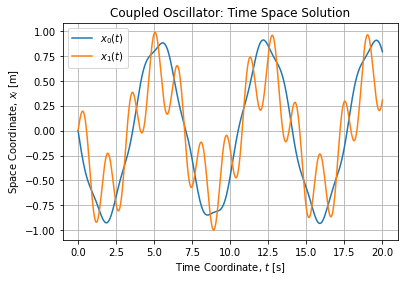

In [12]:
fig, axe = plt.subplots()
axe.plot(t, solution.y[:n].T)
axe.set_title("Coupled Oscillator: Time Space Solution")
axe.set_xlabel("Time Coordinate, $t$ [s]")
axe.set_ylabel("Space Coordinate, $x_i$ [m]")
axe.grid()
axe.legend(["$x_%d(t)$" % i for i in range(n)])

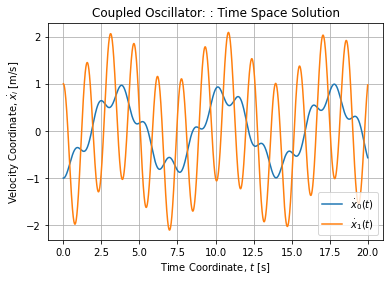

In [13]:
fig, axe = plt.subplots()
axe.plot(t, solution.y[n:].T)
axe.set_title("Coupled Oscillator: : Time Space Solution")
axe.set_xlabel("Time Coordinate, $t$ [s]")
axe.set_ylabel("Velocity Coordinate, $\dot{x}_i$ [m/s]")
axe.grid()
axe.legend(["$\dot{x}_%d(t)$" % i for i in range(n)])

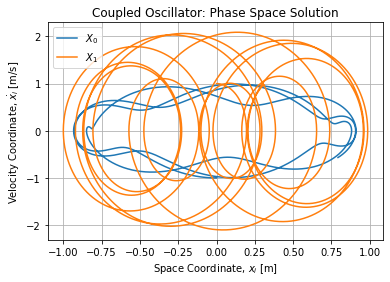

In [14]:
fig, axe = plt.subplots()
for i in range(n):
    axe.plot(solution.y[i], solution.y[n+i], label="$X_%d$" % i)
axe.set_title("Coupled Oscillator: Phase Space Solution")
axe.set_xlabel("Space Coordinate, $x_i$ [m]")
axe.set_ylabel("Velocity Coordinate, $\dot{x}_i$ [m/s]")
axe.grid()
axe.legend()

In [15]:
system(t[50], solution.y[:,50], W)

array([-0.97924123,  0.8767025 ,  0.41024619, -2.43130063])

In [16]:
t[5]

0.010001000100010001

In [17]:
solution.y[:,50]

array([-0.09931473,  0.09587689, -0.97924123,  0.8767025 ])